<img src="../../img/ml_theme.png">
## <center> Дополнительное профессиональное <br> образование НИУ ВШЭ </center>
#### <center>Программа "Практический анализ данных и машинное обучение" </center>
<img src="../../img/faculty_logo.jpg" height="240" width="240">
### <center> Автор материала: Анвар Киекбаев </center>

## <center> Индивидуальный проект по анализу данных </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Построение признаков
 - Отбор признаков
 - Построение модели
 - Кросс-валидация, подбор параметров
 - Кривые валидации и обучения
 - Прогноз для тестовой (или отложенной) выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [1]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


###  Часть 1. Описание набора данных и признаков

Данные взяты из <a href="https://special.habrahabr.ru/beeline/">конкурса</a> Билайн.   

Представлены анонимизированные данные об абонентах: регион, тарифный план, тип тарифного плана, информация об объёмах потребления различных услуг оператора и другие.

В файле train.csv содержится информация для построения модели. 
Формат строк: признаки (x0, ..., x61) и целевая переменная — y и представляет возрастную группу.

Так как все данные анонимизированы, сложно догадаться, что значит конкретный признак в реальности.


In [2]:
df = pd.read_csv('./train.csv')
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x53,x54,x55,x56,x57,x58,x59,x60,x61,y
0,b4d8a653ea,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,-0.688706,7e5c97705a,...,0.235333,0.264952,0.000000,0.333333,0.333333,0.333333,0.000000,0.000000,9.0,2
1,467f9617a3,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.870871,5624b8f759,...,1.782346,1.322409,0.011647,0.397671,0.239601,0.249584,0.068220,0.033278,601.0,4
2,190436e528,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.437655,5624b8f759,...,-0.586540,0.672436,0.000000,0.606061,0.121212,0.212121,0.060606,0.000000,33.0,3
3,43859085bc,16a14a2d17,06330986ed,ca63304de0,a62168d626,1746600cb0,1,1,0.004439,f67f142e40,...,-1.600326,-1.838680,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,4
4,a4c3095b75,16a14a2d17,06330986ed,ca63304de0,b7584c2d52,1746600cb0,1,1,0.480977,7e5c97705a,...,0.960991,0.790990,0.020161,0.645161,0.258065,0.036290,0.040323,0.000000,248.0,3


###  Часть 2. Первичный анализ признаков

Общая информация по датасету:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 63 columns):
x0     49480 non-null object
x1     49500 non-null object
x2     49528 non-null object
x3     49504 non-null object
x4     49514 non-null object
x5     49490 non-null object
x6     50000 non-null int64
x7     50000 non-null int64
x8     48793 non-null float64
x9     47642 non-null object
x10    45063 non-null object
x11    45089 non-null object
x12    45022 non-null object
x13    45512 non-null float64
x14    47638 non-null object
x15    47633 non-null object
x16    47670 non-null object
x17    47650 non-null object
x18    47654 non-null object
x19    47645 non-null object
x20    47661 non-null object
x21    47622 non-null object
x22    47637 non-null object
x23    48122 non-null float64
x24    48122 non-null float64
x25    48122 non-null float64
x26    48122 non-null float64
x27    48122 non-null float64
x28    48122 non-null float64
x29    48122 non-null float64
x30    48122 n

Видим, что возможно есть количественные(float64) признаки, номинальные(object) признаки и количественные/номинальные/бинарные(int64) признаки.
Рассмотрим более подробно каждые признаки.

Общая статистика по всем количественным признакам:

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x6,50000.0,0.992960,0.083610,0.000000,1.000000,1.000000,1.000000,1.000000
x7,50000.0,0.975860,0.153485,0.000000,1.000000,1.000000,1.000000,1.000000
x8,48793.0,-0.000252,1.023282,-85.252444,-0.255490,0.221047,0.567620,3.426844
x13,45512.0,4428.915253,10943.884658,-99.000000,0.000000,1817.000000,5582.000000,776759.000000
x23,48122.0,35.961299,6.819859,15.226228,30.789115,36.597900,41.096434,135.063367
x24,48122.0,-0.006380,0.968346,-1.310465,-0.606190,-0.239545,0.284950,34.899154
x25,48122.0,-0.005182,0.947373,-0.817005,-0.540656,-0.223776,0.242333,38.146887
x26,48122.0,3.652688,3.427215,0.000000,1.333333,2.833333,5.000000,59.833333
x27,48122.0,0.006831,1.012709,-0.791959,-0.497977,-0.300303,0.133800,28.814227
x28,48122.0,0.002051,1.012566,-0.908422,-0.558758,-0.267042,0.246062,32.699880


Данные содержат **пропуски**.

Посмотрим статистику по признакам **x6** и **x7** - так как min и max у них равен соответственно **0** и **1**, а тип - целочисленный, то скорее всего это бинарные признаки:

In [5]:
print('Признак "x6":\n{}\n'.format(df['x6'].value_counts()))
print('Признак "x7":\n{}'.format(df['x7'].value_counts()))

Признак "x6":
1    49648
0      352
Name: x6, dtype: int64

Признак "x7":
1    48793
0     1207
Name: x7, dtype: int64


Судя по статистике, данные **бинарные** и содержат **пропуски**.

Посмотрим статистику по номинальным признакам:

In [6]:
nominal_stats = ['count', 'nunique', 'most_used_val', 'most_used_val_count']
df_nominal = pd.DataFrame([], [], columns=nominal_stats)
for col, typ in df.dtypes.iteritems():
    if typ == np.object:
        nominal_feature = df[col]
        df_nominal.loc[col] = [
            nominal_feature.count(),
            nominal_feature.nunique(),
            nominal_feature.value_counts().head(1).index[0],
            nominal_feature.value_counts().head(1).values[0]]
        
df_nominal

,count,nunique,most_used_val,most_used_val_count
x0,49480.0,85.0,aa2f3cd34a,13090.0
x1,49500.0,15.0,16a14a2d17,48103.0
x2,49528.0,2.0,06330986ed,48145.0
x3,49504.0,2.0,ca63304de0,49085.0
x4,49514.0,5.0,b7584c2d52,28653.0
x5,49490.0,6.0,1746600cb0,47980.0
x9,47642.0,7.0,f67f142e40,16313.0
x10,45063.0,1849.0,37eee1916c,1074.0
x11,45089.0,4.0,91bb549494,26401.0
x12,45022.0,7.0,e33c63cf35,26098.0


Данные содержат **пропуски**.


Так же имеются признаки, которые могут быть бинарными (**nunique == 2**)

In [7]:
for col in df_nominal[df_nominal['nunique'] == 2].T.columns:
    print('Признак "{}":\n{}\n'.format(col, df[col].value_counts()))    

Признак "x2":
06330986ed    48145
9734efb986     1383
Name: x2, dtype: int64

Признак "x3":
ca63304de0    49085
47732ccfc1      419
Name: x3, dtype: int64

Признак "x15":
617a4ad3f9    42737
eeaf83a4de     4896
Name: x15, dtype: int64



Имеем **41** количественный признак, **5** бинарных признаков с целочисленными и текстовыми значениями (**x2, x3, x6, x7, x15**), а так же **16** номинальных признаков c текстовыми значениями. Целевой признак y - номинальный (возможно порядковый) с целочисленными значениями.


###  Часть 3. Первичный визуальный анализ признаков

Рассмотрим распределение целевой переменной:

2    15774
3    14677
4    10012
5     5419
1     1964
6     1793
0      361
Name: y, dtype: int64

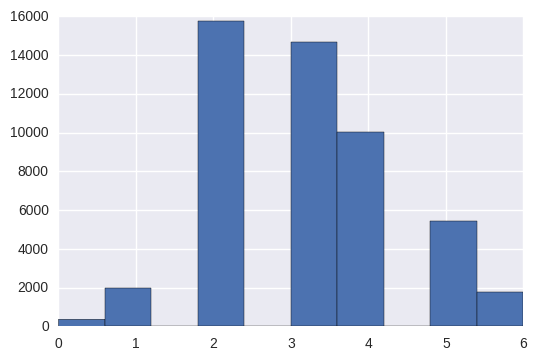

In [10]:
df['y'].hist();
df['y'].value_counts()

Что-то похожее на нормальное распределение. Скорее всего, что признак порядковый (возрастная группа скорее всего представляет интервалы возрастов абонентов по возрастанию, поэтому и распределение близко к нормальному).

Посмотрим корреляцию Пирсона между количественными признаками:

TypeError: __call__() takes from 1 to 2 positional arguments but 3 were given

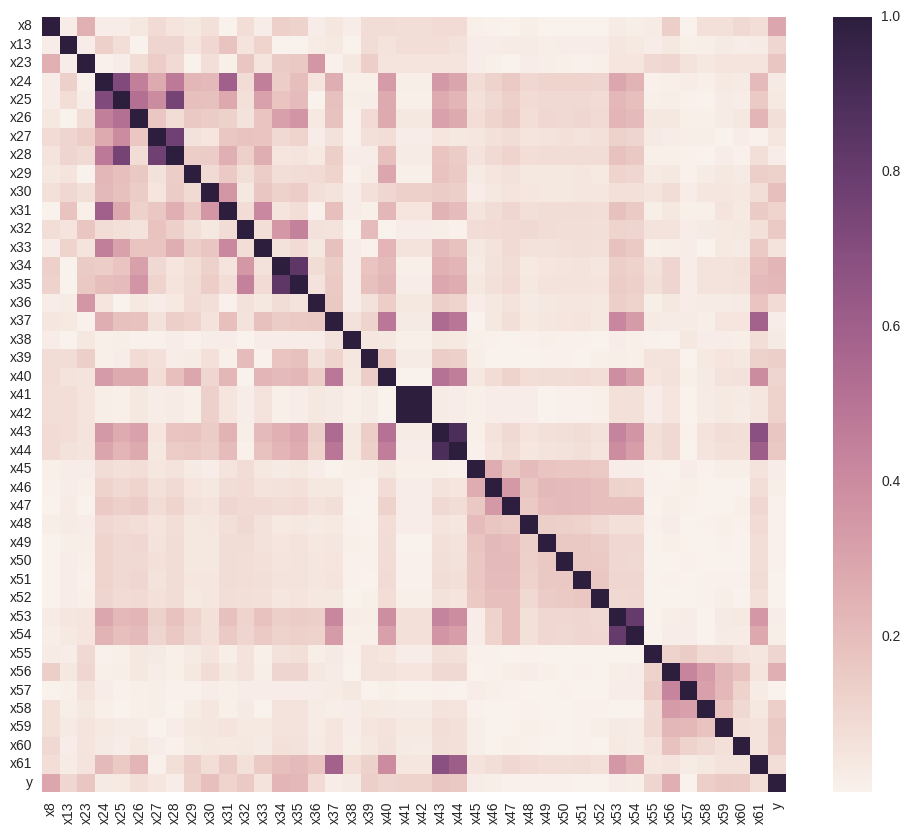

In [35]:
feauters =\
    [
        col for col, typ in df.dtypes.iteritems()\
                                               if typ not in [np.object, np.int64]\
                                               and col not in ['x2', 'x3', 'x15']
    ]
feauters.append('y')
corr = df[feauters].corr().abs()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, ax=ax)
corr.loc('x8', 'y')

Достаточно много коррелирующих признаков. Попробуем отсеить 

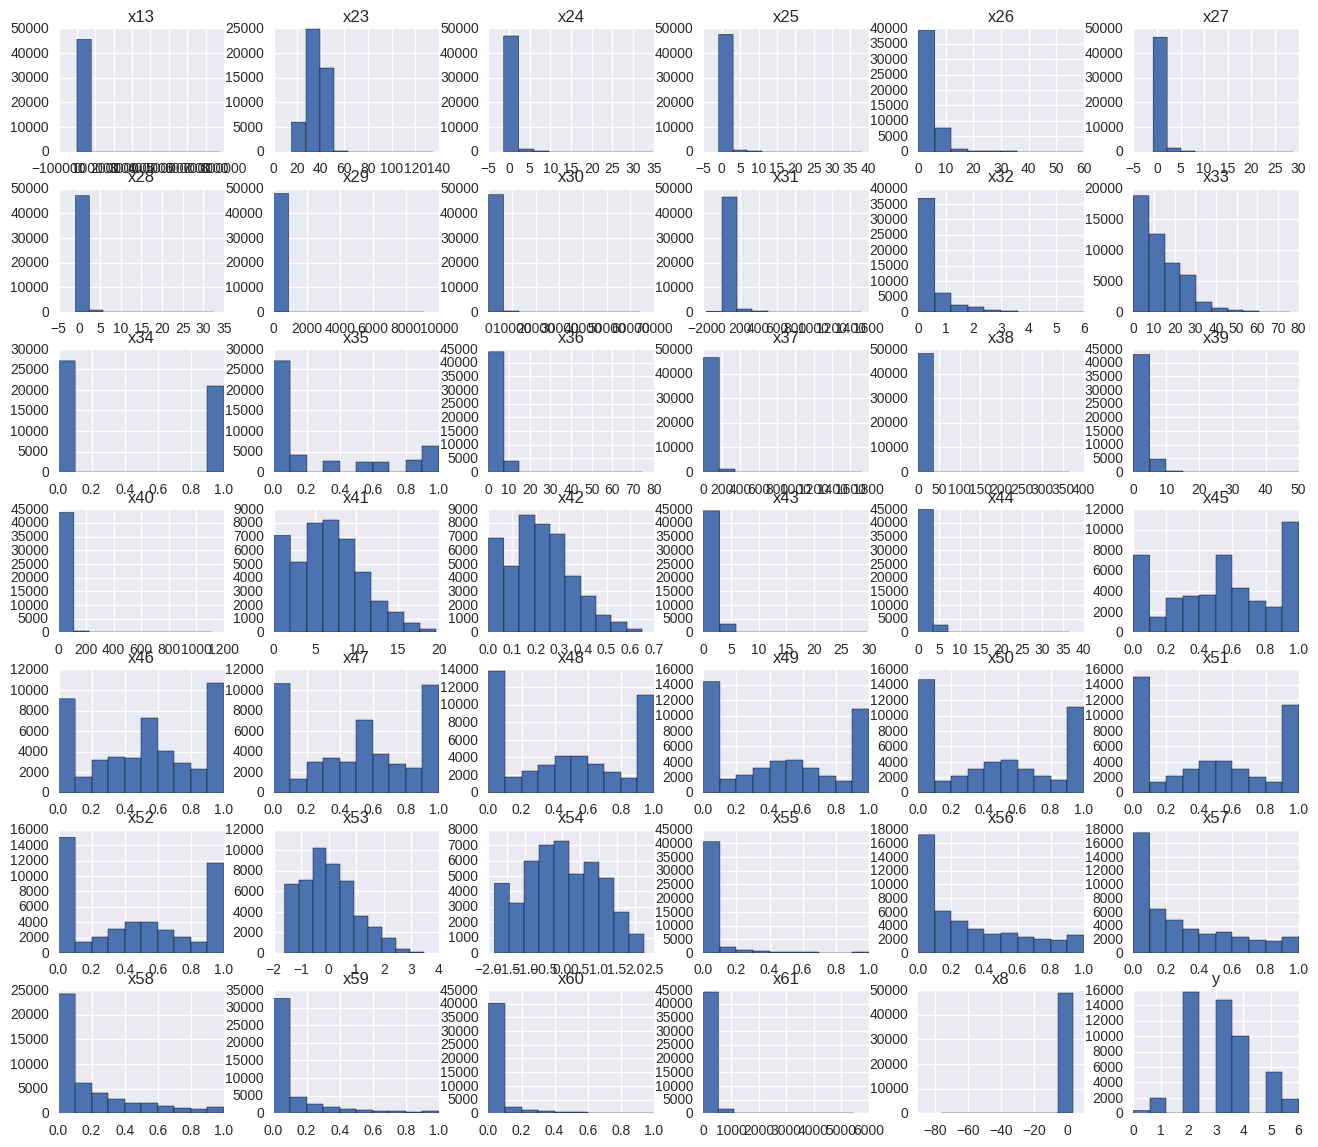

In [34]:


plots = df[feauters].hist(figsize=(16,14))

###  Часть 4. Закономерности, "инсайты", особенности данных

###  Часть 5. Предобработка данных 

###  Часть 6. Построение признаков

###  Часть 7. Отбор признаков

###  Часть 8. Построение модели

###  Часть 9. Кросс-валидация, подбор параметров

###  Часть 10. Кривые валидации и обучения

###  Часть 11. Прогноз для тестовой (или отложенной) выборки

###  Часть 12. Оценка модели с описанием выбранной метрики

### Часть 13. Выводы 